In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [232]:
use_columns = ["V0001", "Q074"]

In [233]:
pns = pd.read_csv("pns2019.csv", usecols=use_columns)

In [234]:
pns

,V0001,Q074
0,11,2.0
1,11,NaN
2,11,NaN
3,11,NaN
4,11,NaN
...,...,...
293721,53,NaN
293722,53,NaN
293723,53,NaN
293724,53,NaN


In [235]:
pns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V0001   293726 non-null  int64  
 1   Q074    90846 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 4.5 MB


In [236]:
pns["Q074"].value_counts()

Q074
2.0    86379
1.0     4467
Name: count, dtype: int64

In [237]:
pns['Q074'] = pd.to_numeric(pns['Q074'], errors='coerce')

In [238]:
pns = pns.dropna(subset=['Q074'])

In [239]:
pns

,V0001,Q074
0,11,2.0
9,11,2.0
10,11,2.0
18,11,2.0
19,11,2.0
...,...,...
293709,53,2.0
293712,53,2.0
293713,53,2.0
293718,53,2.0


In [240]:
mapeamento_estados = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [241]:
pns['V0001'] = pns['V0001'].map(mapeamento_estados)

/tmp/ipykernel_6860/271576639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['V0001'] = pns['V0001'].map(mapeamento_estados)


In [242]:
contagem_estados = pns.groupby(['V0001', 'Q074']).size().unstack(fill_value=0)

In [243]:
contagem_estados

Q074,1.0,2.0
V0001,,
Acre,93,2287
Alagoas,116,2871
Amapá,93,1461
Amazonas,151,3328
Bahia,117,3542
Ceará,200,4065
Distrito Federal,120,2245
Espírito Santo,231,3310
Goiás,146,2556


[]

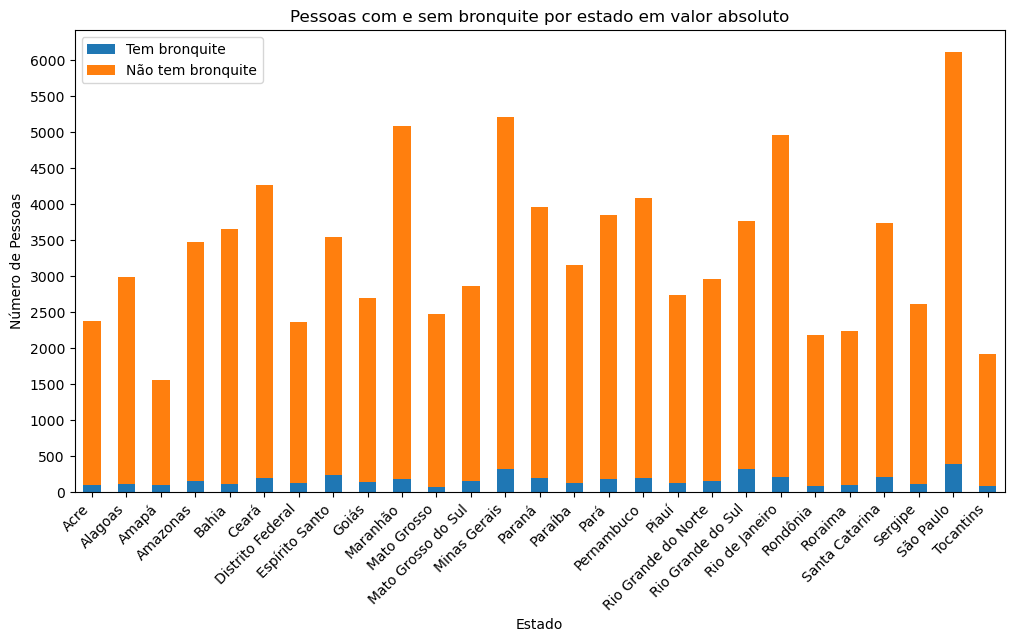

In [244]:
contagem_estados.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por estado em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 7000, step=500))
#plt.savefig('Graficos/grafico_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [245]:
i = 0
contagem_estados['Possui bronquite(%)'] = 0
contagem_estados['Nao possui bronquite(%)'] = 0
for index, row in contagem_estados.iterrows():
    QTotal = row[1.0] + row[2.0]
    contagem_estados.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_estados.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

/tmp/ipykernel_6860/3583408121.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3.907563025210084' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_estados.iat[i,2] = (row[1.0]/QTotal) * 100
/tmp/ipykernel_6860/3583408121.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '96.09243697478992' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_estados.iat[i,3] = (row[2.0]/QTotal) * 100


In [246]:
contagem_estados

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
V0001,,,,
Acre,93,2287,3.907563,96.092437
Alagoas,116,2871,3.883495,96.116505
Amapá,93,1461,5.984556,94.015444
Amazonas,151,3328,4.340328,95.659672
Bahia,117,3542,3.197595,96.802405
Ceará,200,4065,4.689332,95.310668
Distrito Federal,120,2245,5.073996,94.926004
Espírito Santo,231,3310,6.523581,93.476419
Goiás,146,2556,5.403405,94.596595


[]

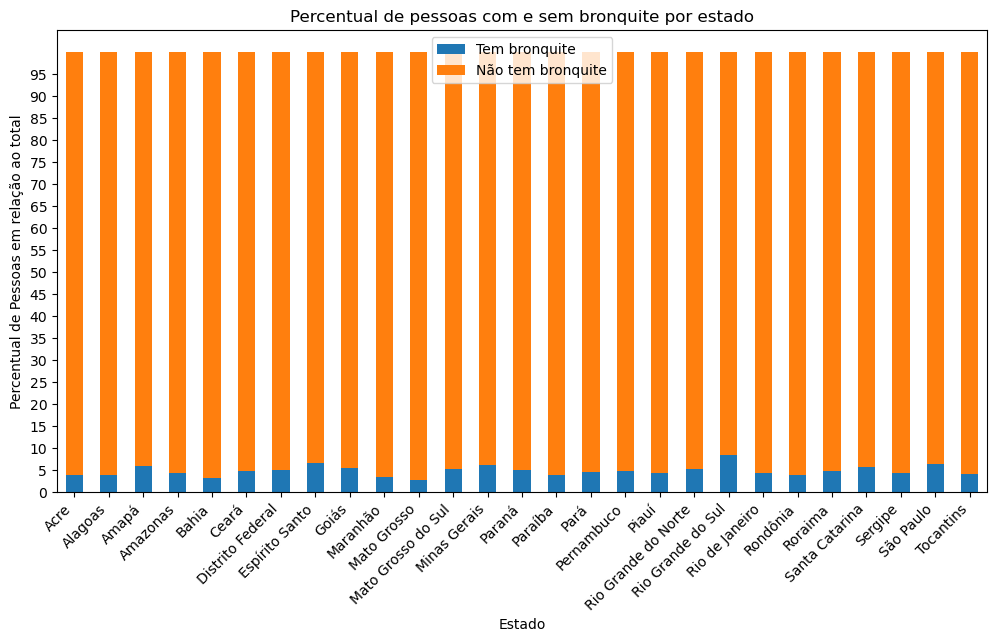

In [ ]:
contagem_estados[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por estado')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(ticks=np.arange(0,100, step=5.0))
#plt.savefig('Graficos/grafico_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

In [248]:
mapeamento_regiao = {
    'Rondônia': 'Norte',
    'Acre': 'Norte',
    'Amazonas': 'Norte',
    'Roraima': 'Norte',
    'Pará': 'Norte',
    'Amapá': 'Norte',
    'Tocantins': 'Norte',
    'Maranhão': 'Nordeste',
    'Piauí': 'Nordeste',
    'Ceará': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Alagoas': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Bahia': 'Nordeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Distrito Federal': 'Centro-Oeste',
    'Minas Gerais': 'Sudeste',
    'Espírito Santo': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Santa Catarina': 'Sul',
    'Rio Grande do Sul': 'Sul'
}

In [249]:
pns['V0001'] = pns['V0001'].map(mapeamento_regiao)

/tmp/ipykernel_6860/128373297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pns['V0001'] = pns['V0001'].map(mapeamento_regiao)


In [250]:
contagem_regiao = pns.groupby(['V0001', 'Q074'], as_index=True)[['V0001']].size().unstack(fill_value=0)

In [251]:
contagem_regiao

Q074,1.0,2.0
V0001,,
Centro-Oeste,480,9918
Nordeste,1319,30225
Norte,785,16817
Sudeste,1153,18677
Sul,730,10742


In [252]:
contagem_regiao.columns

Index([1.0, 2.0], dtype='float64', name='Q074')

[]

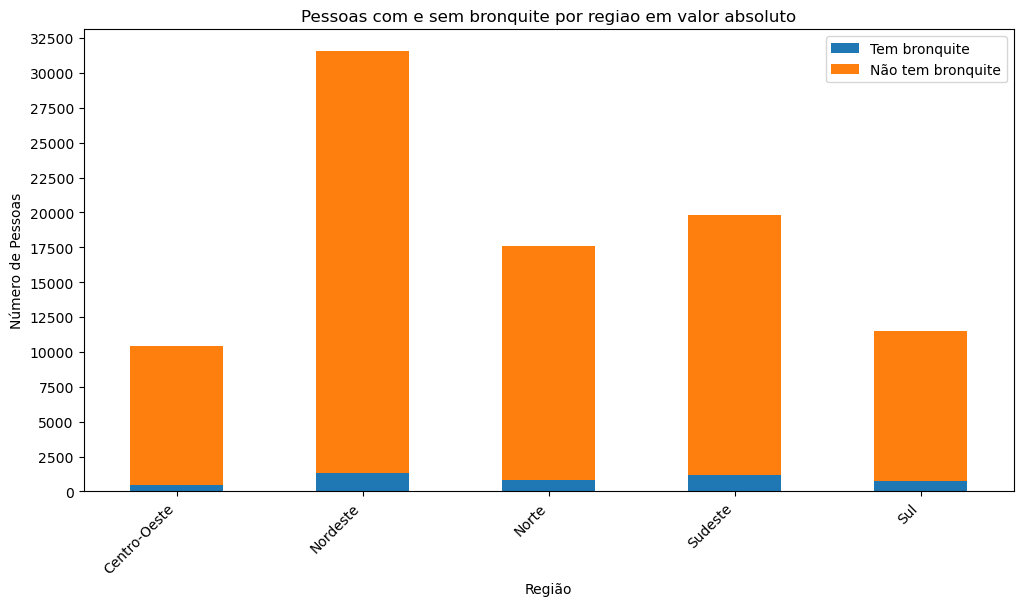

In [253]:
contagem_regiao.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Número de Pessoas')
plt.title('Pessoas com e sem bronquite por regiao em valor absoluto')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 35000, 2500))
#plt.savefig('Graficos/grafico_regional_bronquite_absoluto.png', dpi=300, bbox_inches='tight')
plt.plot()

In [254]:
i = 0
contagem_regiao['Possui bronquite(%)'] = 0
contagem_regiao['Nao possui bronquite(%)'] = 0
for index, row in contagem_regiao.iterrows():
    QTotal = row[1.0] + row[2.0]
    contagem_regiao.iat[i,2] = (row[1.0]/QTotal) * 100
    contagem_regiao.iat[i,3] = (row[2.0]/QTotal) * 100
    i += 1

/tmp/ipykernel_6860/2599192803.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.616272360069244' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_regiao.iat[i,2] = (row[1.0]/QTotal) * 100
/tmp/ipykernel_6860/2599192803.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '95.38372763993075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  contagem_regiao.iat[i,3] = (row[2.0]/QTotal) * 100


In [255]:
contagem_regiao

Q074,1.0,2.0,Possui bronquite(%),Nao possui bronquite(%)
V0001,,,,
Centro-Oeste,480,9918,4.616272,95.383728
Nordeste,1319,30225,4.181461,95.818539
Norte,785,16817,4.459720,95.540280
Sudeste,1153,18677,5.814423,94.185577
Sul,730,10742,6.363319,93.636681


[]

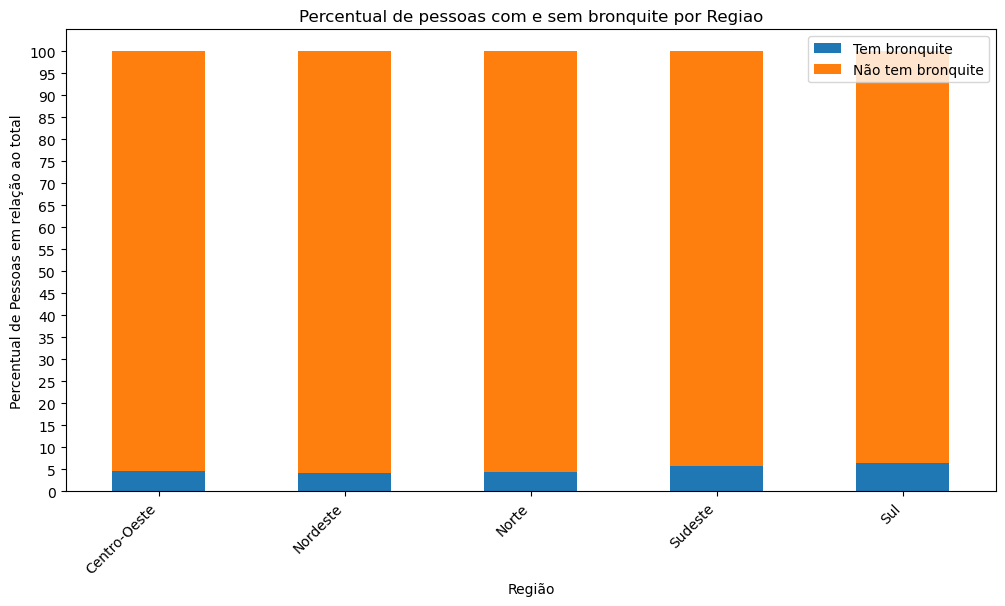

In [ ]:
contagem_regiao[['Possui bronquite(%)','Nao possui bronquite(%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Região')
plt.ylabel('Percentual de Pessoas em relação ao total')
plt.title('Percentual de pessoas com e sem bronquite por Regiao')
plt.legend(['Tem bronquite', 'Não tem bronquite'])
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 105, 5))
#plt.savefig('Graficos/grafico_regional_bronquite_relativo.png', dpi=300, bbox_inches='tight')
plt.plot()

In [257]:
contagem_regiao.reset_index(inplace=True)

In [258]:
reg_Norte_Sul = contagem_regiao.loc[(contagem_regiao['V0001'] == 'Norte') | (contagem_regiao['V0001'] == 'Sul')][[1.0,2.0]]
reg_Norte_Nordeste = contagem_regiao.loc[(contagem_regiao['V0001'] == 'Norte') | (contagem_regiao['V0001'] == 'Nordeste')][[1.0,2.0]]
reg_Norte_Sudeste = contagem_regiao.loc[(contagem_regiao['V0001'] == 'Norte') | (contagem_regiao['V0001'] == 'Sudeste')][[1.0,2.0]]
reg_Norte_Centro = contagem_regiao.loc[(contagem_regiao['V0001'] == 'Norte') | (contagem_regiao['V0001'] == 'Centro-Oeste')][[1.0,2.0]]

In [259]:
def teste_chi_quadrado(regioes):
    chi2, p, dof, expected = stats.chi2_contingency(regioes)
    print("\nResultados do teste de qui-quadrado:")
    print(f"Estatística do teste de qui-quadrado: {chi2}")
    print(f"Valor-p: {p:.20f}")
    print(f"Graus de liberdade: {dof}")
    print("Tabela de frequências esperadas:")
    print(expected)
    if p < 0.05:
        print("Hipotese nula rejeitada")
    else:
        print("Hipotese nula aceita")

In [260]:
teste_chi_quadrado(reg_Norte_Sul)


Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 50.56961996007304
Valor-p: 0.00000000000115011652
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  917.21228589 16684.78771411]
 [  597.78771411 10874.21228589]]
Hipotese nula rejeitada


In [261]:
teste_chi_quadrado(reg_Norte_Nordeste)


Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 2.0673317361032812
Valor-p: 0.15048460177733538612
Graus de liberdade: 1
Tabela de frequências esperadas:
[[ 1350.43698368 30193.56301632]
 [  753.56301632 16848.43698368]]
Hipotese nula aceita


In [262]:
teste_chi_quadrado(reg_Norte_Centro)


Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 0.33597280099111587
Valor-p: 0.56216307312259150564
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  469.76678571  9928.23321429]
 [  795.23321429 16806.76678571]]
Hipotese nula aceita


In [263]:
teste_chi_quadrado(reg_Norte_Sudeste)


Resultados do teste de qui-quadrado:
Estatística do teste de qui-quadrado: 34.58293840739914
Valor-p: 0.00000000408470836919
Graus de liberdade: 1
Tabela de frequências esperadas:
[[  911.32389399 16690.67610601]
 [ 1026.67610601 18803.32389399]]
Hipotese nula rejeitada
